 #

# Ma422 Project - Adult income dataset

Objective : The objective is to predict, according to some characteristics, if a person earns more than $50K per year or not


We import the librairies we need to read the datas and analyse it.

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

We open and read the datas file.

In [43]:
df = pd.read_csv('src/datas/adult.csv', header=0)
df = df.sample(frac=0.2)  # Working with 20% of the dataset to avoid long time program run
#df_copy = df.copy()
print(df)

       age         workclass  fnlwgt   education  educational-num  \
42213   69           Private  197080     HS-grad                9   
40808   63                 ?   97823        11th                7   
37730   34           Private  162442     HS-grad                9   
10009   44  Self-emp-not-inc  273465  Assoc-acdm               12   
40833   51         Local-gov  143865        10th                6   
...    ...               ...     ...         ...              ...   
36693   70      Self-emp-inc  243436         9th                5   
13808   49           Private  118520     HS-grad                9   
3571    25           Private  194813     HS-grad                9   
31654   17           Private   95799        11th                7   
39382   40           Private   89226   Bachelors               13   

           marital-status     occupation   relationship   race  gender  \
42213             Widowed   Adm-clerical      Unmarried  White    Male   
40808  Married-civ-spou

## 1 - Quick dataset analysis

Now that the dataset is imported in the jupyter file, we can start exploring, digging in the datas to see what it is composed of, understand the variables in it, the possible links between them, find the target etc. This step is very important because it allows the user to understand the meaning of datasets, see if information has to be changed, or removed and also start thinking about how datas should be used with the future implemented model.

A) Dataset cleaning and verifications



First, we check if there are repetitions of observations in the dataset. If yes, we erase them with the method `drop_duplicates` from `pandas` library.

In [44]:
df = df.drop_duplicates()
print(df)

       age         workclass  fnlwgt   education  educational-num  \
42213   69           Private  197080     HS-grad                9   
40808   63                 ?   97823        11th                7   
37730   34           Private  162442     HS-grad                9   
10009   44  Self-emp-not-inc  273465  Assoc-acdm               12   
40833   51         Local-gov  143865        10th                6   
...    ...               ...     ...         ...              ...   
36693   70      Self-emp-inc  243436         9th                5   
13808   49           Private  118520     HS-grad                9   
3571    25           Private  194813     HS-grad                9   
31654   17           Private   95799        11th                7   
39382   40           Private   89226   Bachelors               13   

           marital-status     occupation   relationship   race  gender  \
42213             Widowed   Adm-clerical      Unmarried  White    Male   
40808  Married-civ-spou

In [45]:
# Remplace "?" by NaN
df.replace(' ?', np.nan, inplace=True)

Then, we remove them in order to have valid datas to send to the model.
We will use the method `isna` from `pandas` library to list the missing values.

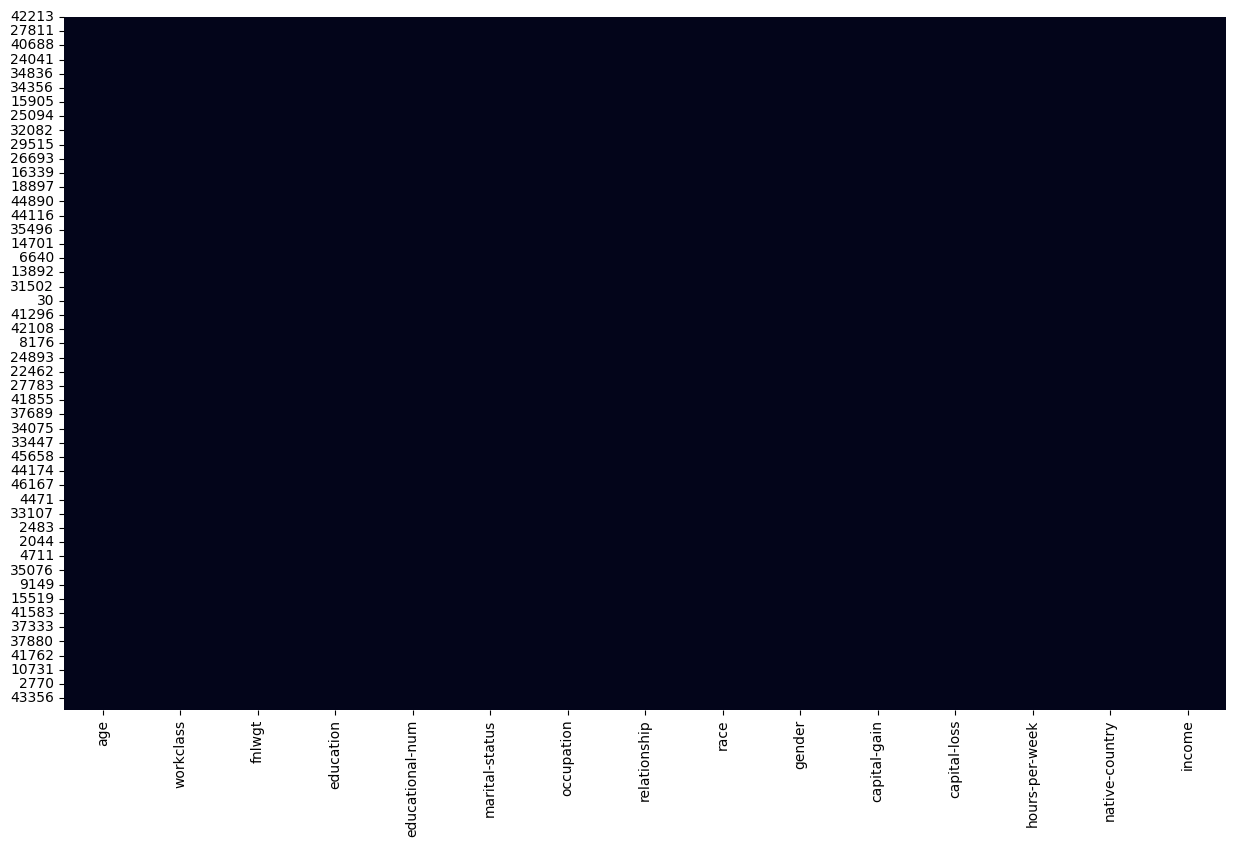

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64


In [46]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isna(), cbar=False)
plt.show()

percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)

print(percentageOfNaNValues) # Normalized values between O and 1

B) Analysis the dataset

In [47]:
columnNames = df.columns
datasetShape = df.shape
variablesTypes = df.dtypes
variablesTypesCount = df.dtypes.value_counts()

print('Column names :', columnNames, '\n')
print('Dataset Shape :', datasetShape, '\n')
print('Variables Types :', variablesTypes, '\n')
print('Variables Types Count :', variablesTypesCount)

Column names : Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 

Dataset Shape : (9765, 15) 

Variables Types : age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object 

Variables Types Count : object    9
int64     6
dtype: int64


**Correlation matix**

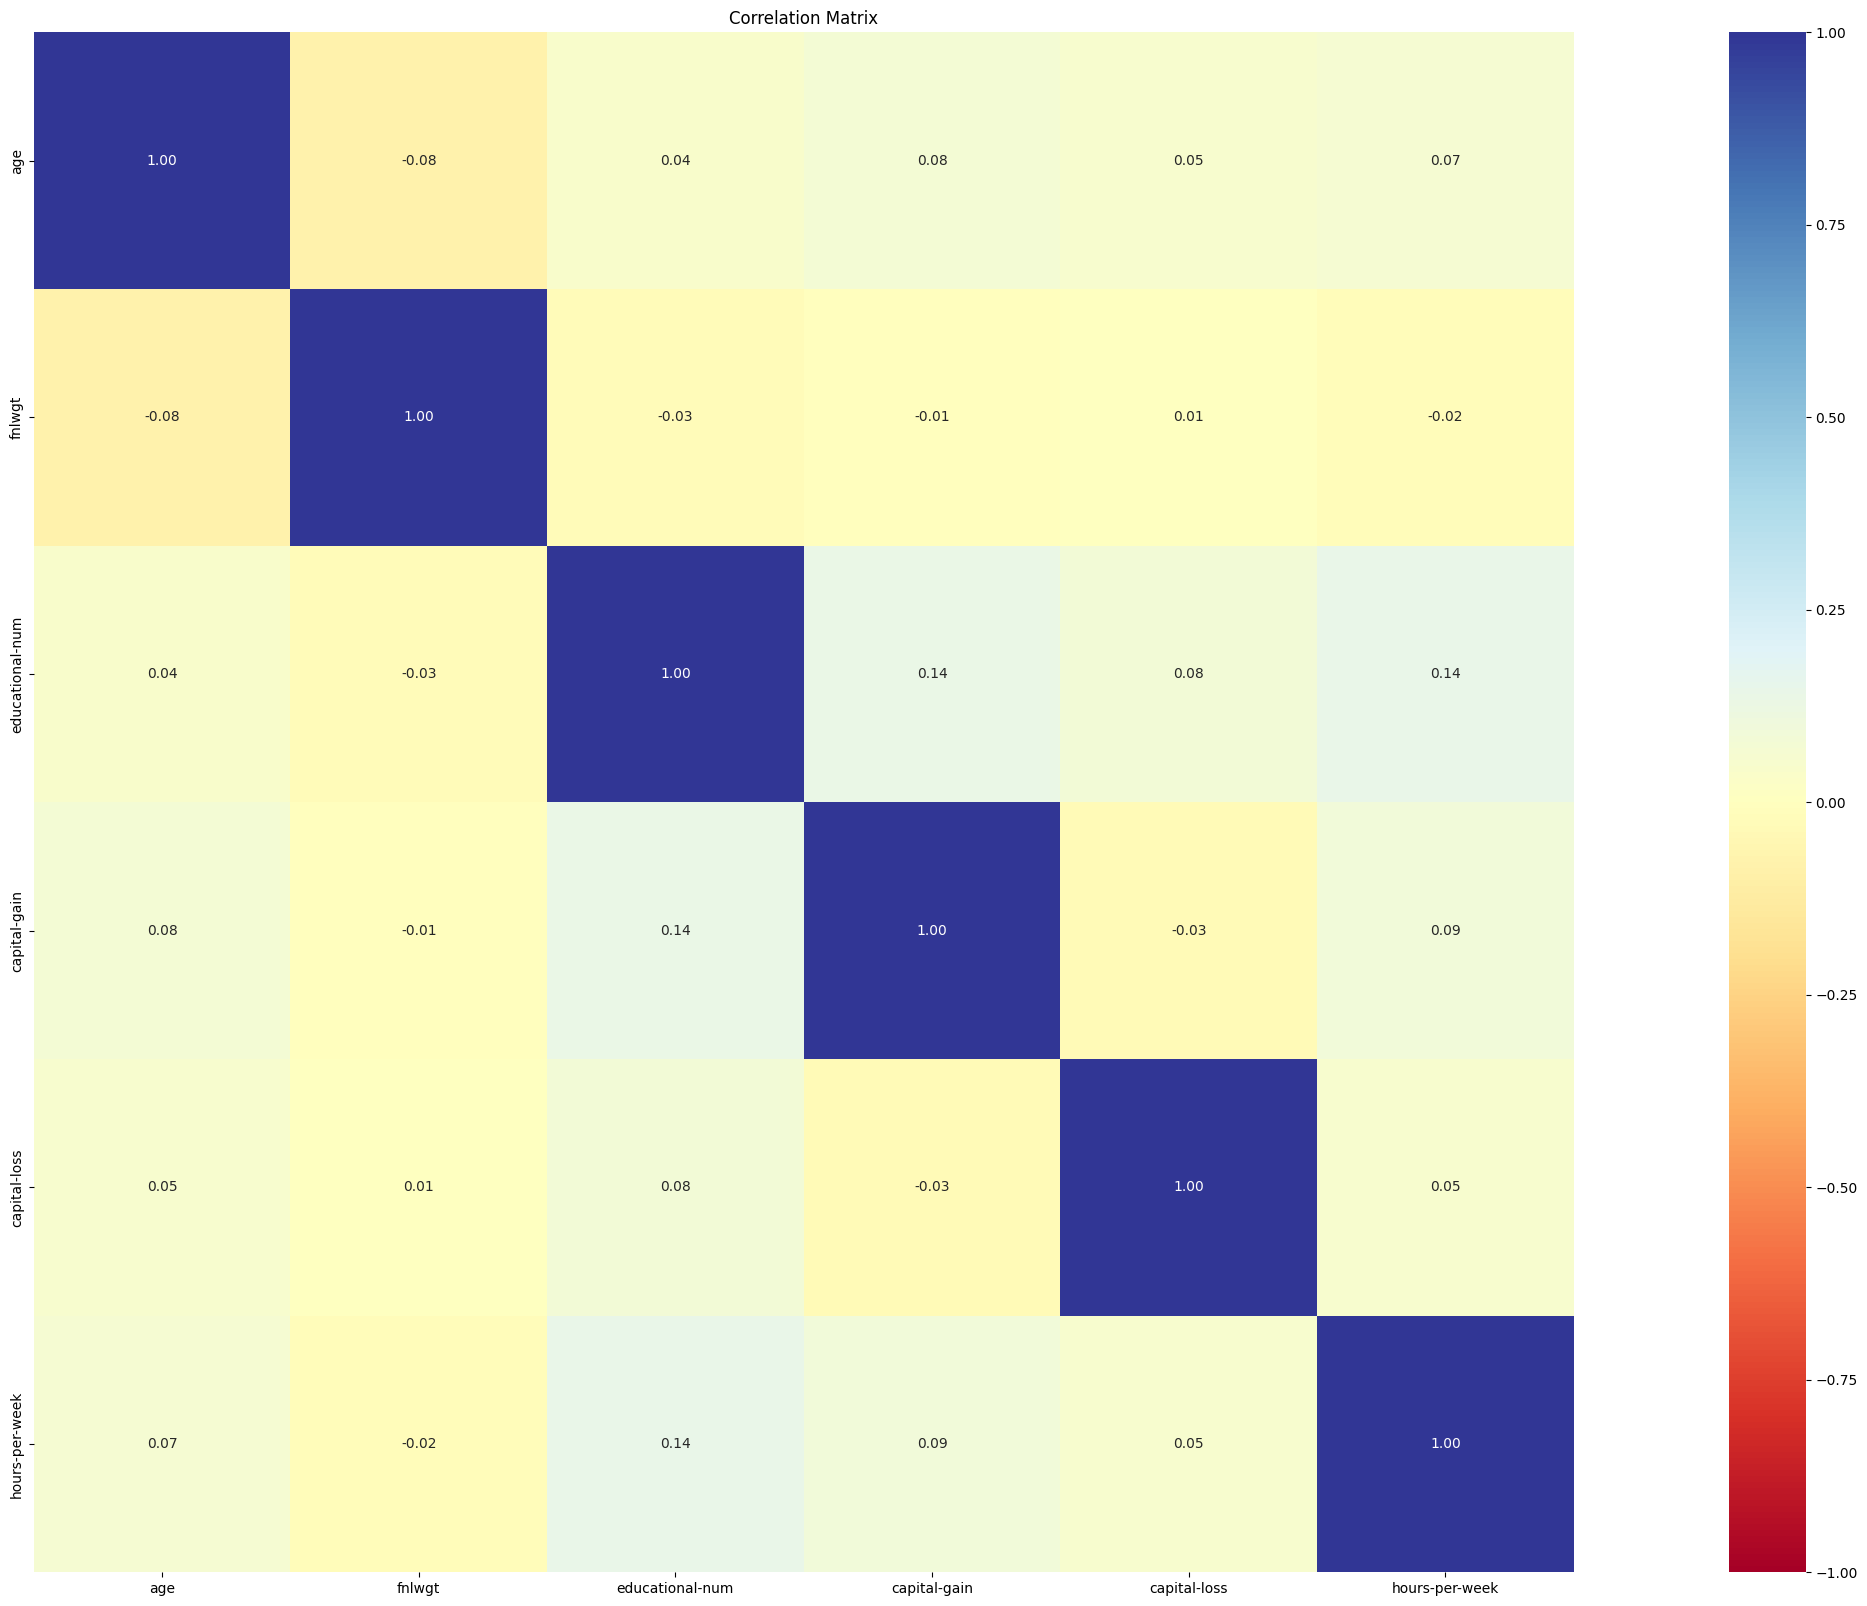

In [48]:
# Compute the correlation matrix
corr_mat = df.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(40, 20))

# Create the heatmap
sns.heatmap(corr_mat, cmap='RdYlBu', annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, ax=ax)

# Set the title
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

Dropping the useless features.

In [49]:
df = df.drop(['age', 'educational-num', 'marital-status', 'hours-per-week', 'race', 'fnlwgt'], axis=1)
print(df)

              workclass   education     occupation   relationship  gender  \
42213           Private     HS-grad   Adm-clerical      Unmarried    Male   
40808                 ?        11th              ?        Husband    Male   
37730           Private     HS-grad   Adm-clerical           Wife  Female   
10009  Self-emp-not-inc  Assoc-acdm          Sales      Own-child    Male   
40833         Local-gov        10th  Other-service  Not-in-family  Female   
...                 ...         ...            ...            ...     ...   
36693      Self-emp-inc         9th          Sales  Not-in-family    Male   
13808           Private     HS-grad   Adm-clerical  Not-in-family  Female   
3571            Private     HS-grad   Craft-repair        Husband    Male   
31654           Private        11th          Sales      Own-child  Female   
39382           Private   Bachelors          Sales        Husband    Male   

       capital-gain  capital-loss native-country income  
42213            

C) Analysis of the target variable

Repartition of the target :
 <=50K    7327
>50K     2438
Name: income, dtype: int64

Type of this variable: object


<Axes: ylabel='income'>

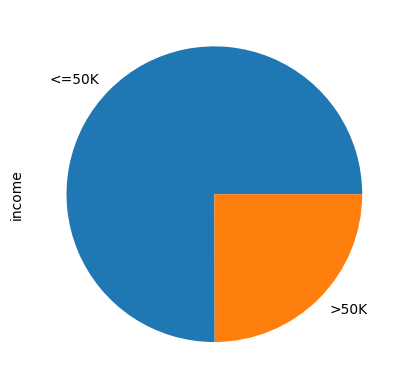

In [50]:
count_target = df['income'].value_counts()
target_type = df['income'].dtype

print('Repartition of the target :\n', count_target)
print('\nType of this variable:', target_type)
count_target.plot.pie()

## 2 - Pre-processing

In [51]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Pre-processing of the variables

In [52]:
print(df.columns.tolist())
encoder = preprocessing.LabelEncoder()
features = ['workclass', 'education', 'occupation', 'relationship', 'gender', 'native-country', 'income']
df[features] = df[features].apply(encoder.fit_transform)
print(df)

['workclass', 'education', 'occupation', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'native-country', 'income']
       workclass  education  occupation  relationship  gender  capital-gain  \
42213          4         11           1             4       1             0   
40808          0          1           0             0       1             0   
37730          4         11           1             5       0             0   
10009          6          7          12             3       1             0   
40833          2          0           8             1       0             0   
...          ...        ...         ...           ...     ...           ...   
36693          5          6          12             1       1             0   
13808          4         11           1             1       0             0   
3571           4         11           3             0       1             0   
31654          4          1          12             3       0             0   
3938

We can finally build the matrices X and y.

In [53]:
X = df.drop(['income'], axis=1)
y = df['income']

print(X)
print(y)

# Samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
print(X_train.shape)
print(X_test.shape)

       workclass  education  occupation  relationship  gender  capital-gain  \
42213          4         11           1             4       1             0   
40808          0          1           0             0       1             0   
37730          4         11           1             5       0             0   
10009          6          7          12             3       1             0   
40833          2          0           8             1       0             0   
...          ...        ...         ...           ...     ...           ...   
36693          5          6          12             1       1             0   
13808          4         11           1             1       0             0   
3571           4         11           3             0       1             0   
31654          4          1          12             3       0             0   
39382          4          9          12             0       1             0   

       capital-loss  native-country  
42213        

## 3 - Ensemble learning methods

#### A) Bagging method

We import the needed librairies for this section.

In [34]:
from collections import Counter
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

We can try several methods and compare their performances.


Bagging method from scratch.

In [35]:
def BaggingScratch(X_train, y_train, X_test, base_estimator, n_estimators=10):
    y_pred = np.zeros((X_test.shape[0], n_estimators))  # Initialization of the array which will store all the predictions for n estimators

    for i in range(n_estimators):
        num = np.random.choice(X_train.index.values, size=X_train.shape[0], replace=True)  # Resample with replacement
        X_bstr = X_train.loc[num]  # Access to the row which has index num
        y_bstr = y_train.loc[num]  # Access to the column which has index num
        base_estimator.fit(X_bstr, y_bstr)  # Fitting with a base_estimator
        y_pred[:, i] = base_estimator.predict(X_test)  # Writing the predictions results in y_pred array

    # Aggregate the predictions using majority voting
    y_pred_majority = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        y_pred_i = y_pred[i, :]
        c = Counter(y_pred_i)  # Read all the values in y_pred_i
        y_pred_majority[i] = c.most_common(1)[0][0]  # Getting the most common element and its count (passing 1 as argument and [0][0] to get the most common element)

    return y_pred_majority

knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()
y_pred_knn = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=knn)
y_pred_lr = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=lr)
# number of estimators is set to 100 by default

accuracyScratch_KNN = accuracy_score(y_test, y_pred_knn)
accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
print('Accuracy for Bagging from Scratch with KNN :', accuracyScratch_KNN)
print('Accuracy for Bagging from Scratch with LR :', accuracyScratch_LR)

Accuracy for Bagging from Scratch with KNN : 0.8532423208191127
Accuracy for Bagging from Scratch with LR : 0.8177474402730376


Bagging method using scikit-learn.

In [36]:
# Bagging KNN
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [KNeighborsClassifier()]}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model1_KNN = GridSearchCV(BaggingClassifier(), param_grid=param_grid)
model1_KNN.fit(X_train, y_train)
model1_KNN.predict(X_test)
accuracy1 = model1_KNN.score(X_test, y_test)

print("Best value of n_estimators:", model1_KNN.best_params_['n_estimators'])
print("Accuracy for bagging with KNN:", accuracy1)

###

# Single KNN
# Defining different values of n_neighbors to try
n_neighbors = [i for i in range(1, 27, 2)]

# loop over different values of n_neighbors and evaluate the score to select the hyperparameters with high score
best_score = 0
best_k = 0
for k in n_neighbors:
    # For each value of n_neighbors, we execute a model prediction and look at its accuracy.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model.predict(X_test)
    score = model.score(X_test, y_test)
    if score > best_score:  # The parameters with the best accuracy are stored into variables
        best_score = score
        best_k = k

model2_KNN = KNeighborsClassifier(n_neighbors=best_k)
model2_KNN.fit(X_train, y_train)
model2_KNN.predict(X_test)
accuracy2 = model2_KNN.score(X_test, y_test)

print("Best value of k:", best_k)
print("Accuracy with single KNN:", accuracy2)


if (accuracy1 > accuracy2):
    print('The bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('The single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))

KeyboardInterrupt: 

In [ ]:
# Bagging Logistic Regression
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression()]}

model1_LR = GridSearchCV(BaggingClassifier(), param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_LR.fit(X_train, y_train)
model1_LR.predict(X_test)
accuracy1 = model1_LR.score(X_test, y_test)

print("Best value of n_estimators for Logistic Regression:", model1_LR.best_params_['n_estimators'])
print("Accuracy for bagging with Logistic Regression:", accuracy1)

###

# Single Logistic Regression
# Defining the parameter grid for logistic regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

model2_LR = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10)  # Performing Grid Search to find the best parameters for Logistic Regression
model2_LR.fit(X_train, y_train)
model2_LR.predict(X_test)
accuracy2 = model2_LR.score(X_test, y_test)

print("Best parameters:", model2_LR.best_params_)
print("Accuracy for Logistic Regression:", accuracy2)

###

if (accuracy1 > accuracy2):
    print('The bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('The single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))

Best value of n_estimators for Logistic Regression: 50
Accuracy for bagging with Logistic Regression: 0.8031388604571819
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.8048447628795633
The single method has a better accuracy than the bagging method.
The difference of accuracies between the single method and the bagging is : 0.0017059024223814445


In [ ]:
# Prediction on a new observation
newPerson_df = pd.DataFrame(data=[['Local-gov', 'Some-college', 'Protective-serv', 'Husband', 'Male', 0, 0, 'United-States']], columns=features)
newPerson_df[features] = newPerson_df[features].apply(encoder.fit_transform)

pred_BaggingKNN = model2_KNN.predict(newPerson_df)
if pred_BaggingKNN == 0:
    pred_BaggingKNN = 'Earn less than $50K'
elif pred_BaggingKNN == 1:
    pred_BaggingKNN = 'Earn more than $50K'
print("Prediction Bagging KNN:", pred_BaggingKNN)

pred_BaggingLR = model2_LR.predict(newPerson_df)
if pred_BaggingLR == 0:
    pred_BaggingLR = 'Earn less than $50K'
elif pred_BaggingLR == 1:
    pred_BaggingLR = 'Earn more than $50K'
print("Prediction Bagging LR:", pred_BaggingLR)

#### B) Boosting method

Boosting Methods from scratch

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [40]:
def BoostingScratch(X_train, y_train, X_test, y_test,base_estimator, n_estimators=10):
        Evaluation = pd.DataFrame(y_train.copy())
        Evaluation['weights'] = 1/X_test.shape[0] # Set the initial weights w = 1/N
        

        # Run the boosting algorithm by creating T "weighted models"
        
        alphas = [] 
        models = []
        
        for t in range(n_estimators):

            # Train the Decision Stump(s)
            
            model = base_estimator.fit(X_train,y_train,sample_weight=np.array(Evaluation['weights'])) 
            
            # Append the single weak classifiers to a list which is later on used to make the 
            # weighted decision
            models.append(model)
            predictions = model.predict(X_train)
            score = model.score(X_train,y_train)

            # Add values to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['income'],1,0)
            Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['income'],1,0)

            # Calculate the misclassification rate and accuracy
            accuracy = sum(Evaluation['evaluation'])/len(Evaluation['evaluation'])
            misclassification = sum(Evaluation['misclassified'])/len(Evaluation['misclassified'])

            # Caclulate the error
            err = np.sum(Evaluation['weights']*Evaluation['misclassified'])/np.sum(Evaluation['weights'])
 
            # Calculate the alpha values
            alpha = np.log((1-err)/err)
            alphas.append(alpha)

            # Update the weights wi --> These updated weights are used in the sample_weight parameter
            # for the training of the next decision stump. 
            Evaluation['weights'] *= np.exp(alpha*Evaluation['misclassified'])

            
            # With each model in the self.model list, make a prediction 

            accuracy = []
            predictions = []

            for alpha,model in zip(alphas, models):
                prediction = alpha*model.predict(X_test)
                predictions.append(prediction)
                accuracy.append(np.sum(np.sign(np.sum(np.array(predictions),axis=0))==y_test.values)/len(predictions[0]))

            predictions = np.sign(np.sum(np.array(predictions),axis=0))
            
            return predictions
        
lr = LogisticRegression()
y_pred_lr = BoostingScratch(X_train=X_train, y_train=y_train, X_test=X_test,y_test=y_test, base_estimator=lr)
# number of estimators is set to 100 by default

accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
print('Accuracy for Boosting from Scratch with LR :', accuracyScratch_LR)

Accuracy for Boosting from Scratch with LR : 0.8204778156996587


Boosting method from Sklearn

In [41]:
# Logistic Regression
# define the parameter grid for logistic regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# perform grid search to find the best parameters for logistic regression
model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=param_grid, cv=10, scoring='f1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy1 = f1_score(y_test, y_pred)

print("Best parameters:", model.best_params_)
print("F1 score for Logistic Regression:", accuracy1)

###

# define the range of values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# define the base estimator to use
base_estimator = LogisticRegression()

# define the parameter grid for the bagging classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [base_estimator]}

# perform grid search to find the best value of n_estimators for the bagging classifier
model = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, cv=10, scoring='f1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy2 = f1_score(y_test, y_pred)

print("Best value of n_estimators for Logistic Regression:", model.best_params_['n_estimators'])
print("F1 score for boosting with Logistic Regression:", accuracy2)

###

if (accuracy2 > accuracy1):
    print('The boosting method has a better accuracy than the single method.')
elif (accuracy2 < accuracy1):
    print('The single method has a better accuracy than the boosting method.')
elif (accuracy2 == accuracy1):
    print('The single method and the boosting method as same accuracies.')
print('The difference of accuracies between the single method and the boosting is :', abs(accuracy2 - accuracy1))

KeyboardInterrupt: 

#### C) Stacking method

Stacking method 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier

We use scikit-learn only for classic predictions but not for the classifier and Stacking

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
# Samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

Firstly, we add some prediction functions

In [67]:
KNC = KNeighborsClassifier(n_neighbors=2)   # initialising KNeighbors Classifier
model_kNeighborsClassifier = KNC.fit(X_train, y_train)   # fitting Training Set
pred_knc = model_kNeighborsClassifier.predict(X_test)   # Predicting on test dataset
acc_knc = accuracy_score(y_test, pred_knc)  # evaluating accuracy score
print('Accuracy score of KNeighbors Classifier is:', acc_knc * 100)

NB = GaussianNB()              # initialising Naive Bayes
model_NaiveBayes = NB.fit(X_train, y_train)
pred_nb = model_NaiveBayes.predict(X_test)
acc_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of Naive Bayes Classifier:', acc_nb * 100)

SGD = SGDClassifier(loss='log', random_state=0)
model_SGD_Classifier = SGD.fit(X_train, y_train)   # fitting Training Set
pred_sgd= model_SGD_Classifier.predict(X_test)   # Predicting on test dataset
acc_sgd = accuracy_score(y_test, pred_sgd)  # evaluating accuracy score
print('Accuracy score of SGD Classifier is:', acc_sgd* 100)

TREE = DecisionTreeClassifier(random_state=0)
model_Tree = TREE.fit(X_train, y_train)
pred_tree = model_Tree.predict(X_test)
acc_tree = accuracy_score(y_test, pred_tree)
print('Accuracy of Decision Tree Classifier:', acc_tree * 100)

Accuracy score of KNeighbors Classifier is: 84.19795221843003
Accuracy of Naive Bayes Classifier: 79.76109215017065
Accuracy score of SGD Classifier is: 76.99658703071673
Accuracy of Decision Tree Classifier: 84.09556313993174


In [68]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[KNC, NB, SGD, TREE], meta_classifier = lr, use_probas = True, use_features_in_secondary = True) #Main  StacklingClassifier from mlxtend library

model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test)       # predictions on test data using stacked model

acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('Accuracy score of Stacked model:', acc_stack * 100)

Accuracy score of Stacked model: 83.48122866894198


Stacking method using scikit-learn

In [69]:
import sklearn.ensemble as se

In [70]:
model_stack_bis = se.StackingClassifier([('SGD', SGD),
                                         ('Tree', TREE),
                                         ('KNC', KNC)],
                                         final_estimator=KNeighborsClassifier())

model_stack_bis.fit(X_train, y_train)
model_stack_bis.score(X_test, y_test)

0.8266211604095564